In [1]:
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os import path

# Gradient

In [2]:
folder = 'results_gradient'

In [3]:
lrs = ['0.1','0.01', '0.001']
opts = ['gd', 'rmsprop', 'adam']
res = {}
for lr in lrs:
    df = pd.DataFrame()
    for opt in opts:
        np_loss = np.load(path.join(folder, f'loss_{opt}_{lr}.npy'))
        df_loss = pd.DataFrame(np_loss, columns=[opt])
        df = pd.concat([df, df_loss], axis=1, sort=False)
    res[lr] = df

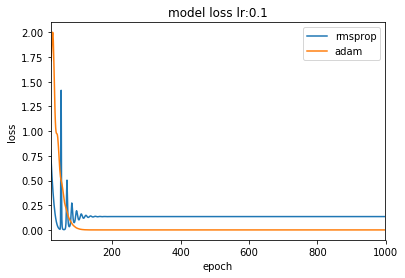

In [4]:
res01 = res['0.1']
res01[['rmsprop','adam']].iloc[20:,:].plot()
plt.title('model loss lr:0.1')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.savefig('ex1_0.1.png')

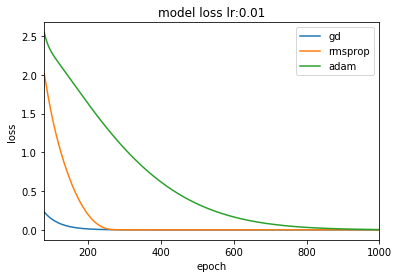

In [5]:
res['0.01'].iloc[80:,:].plot()
plt.title('model loss lr:0.01')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.savefig('ex1_0.01.png')

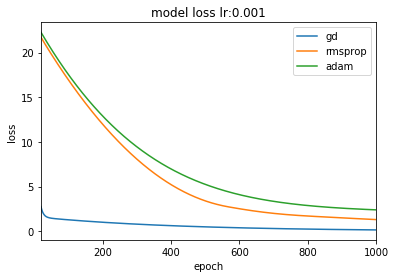

In [6]:
res['0.001'].iloc[20:,:].plot()
plt.title('model loss lr:0.001')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.savefig('ex1_0.001.png')

# Single layer

In [7]:
folder = 'results_singlelayer'

In [8]:
lrs = ['0.1','0.01', '0.001', '0.0001', '1e-05']
opts = ['gd', 'rmsprop', 'adam']
res = {}
for lr in lrs:
    df_loss = pd.DataFrame()
    df_acc = pd.DataFrame()
    for opt in opts:
        np_loss = np.load(path.join(folder, f'loss_{opt}_{lr}.npy'))
        loss = pd.DataFrame(np_loss, columns=[f'tr_{opt}'])
        np_val_loss = np.load(path.join(folder, f'val_loss_{opt}_{lr}.npy'))
        val_loss = pd.DataFrame(np_val_loss, columns=[f'val_{opt}'])
        df_loss = pd.concat([df_loss, loss, val_loss], axis=1, sort=False)
        
        np_acc = np.load(path.join(folder, f'acc_{opt}_{lr}.npy'))
        acc = pd.DataFrame(np_acc, columns=[f'tr_{opt}'])
        np_val_acc = np.load(path.join(folder, f'val_acc_{opt}_{lr}.npy'))
        val_acc = pd.DataFrame(np_val_acc, columns=[f'val_{opt}'])
        df_acc = pd.concat([df_acc, acc, val_acc], axis=1, sort=False)
    res[f'{lr}_loss'] = df_loss
    res[f'{lr}_acc'] = df_acc

In [9]:
res['0.1_loss'].columns
styles = ['b', 'b--', 'r', 'r--', 'g', 'g--']

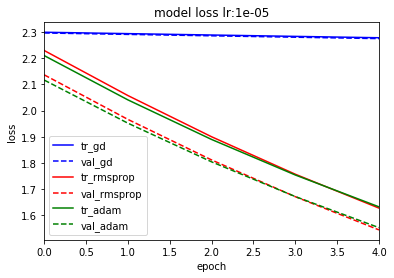

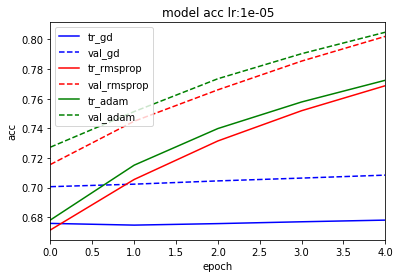

In [10]:
lr = '1e-05'
res[f'{lr}_loss'].plot(style=styles)
plt.title(f'model loss lr:{lr}')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.savefig(f'ex2_{lr}_loss.png')

res[f'{lr}_acc'].plot(style=styles)
plt.title(f'model acc lr:{lr}')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.savefig(f'ex2_{lr}_acc.png')

# Multilayer

In [23]:
folder = 'results_multilayer'

In [29]:
opts = [10, 50, 100]
methods = ['True', 'False']
res = {}
for opt in opts:
    df_loss = pd.DataFrame()
    df_acc = pd.DataFrame()
    for method in methods:
        np_loss = np.load(path.join(folder, f'loss_1_{opt}_{method}_0.5.npy'))
        loss = pd.DataFrame(np_loss, columns=[f'tr_{opt}{method}'])
        np_val_loss = np.load(path.join(folder, f'val_loss_1_{opt}_{method}_0.5.npy'))
        val_loss = pd.DataFrame(np_val_loss, columns=[f'val_{opt}{method}'])
        df_loss = pd.concat([df_loss, loss, val_loss], axis=1, sort=False)

        np_acc = np.load(path.join(folder, f'acc_1_{opt}_{method}_0.5.npy'))
        acc = pd.DataFrame(np_acc, columns=[f'tr_{opt}{method}'])
        np_val_acc = np.load(path.join(folder, f'val_acc_1_{opt}_{method}_0.5.npy'))
        val_acc = pd.DataFrame(np_val_acc, columns=[f'val_{opt}{method}'])
        df_acc = pd.concat([df_acc, acc, val_acc], axis=1, sort=False)
    res[f'{opt}_loss'] = df_loss
    res[f'{opt}_acc'] = df_acc

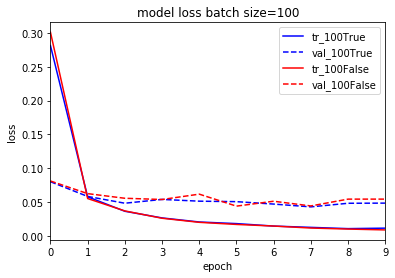

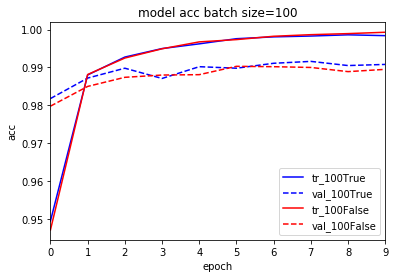

In [32]:
opt = 100
res[f'{opt}_loss'].plot(style=styles)
plt.title(f'model loss batch size={opt}')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.savefig(f'ex3_{opt}_loss.png')

res[f'{opt}_acc'].plot(style=styles)
plt.title(f'model acc batch size={opt}')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.savefig(f'ex3_{opt}_acc.png')

# Multilayer GPU

In [15]:
folder = 'results_multilayer_gpu'

In [20]:
opts = [1, 2, 4]
res = {}
df_loss = pd.DataFrame()
df_acc = pd.DataFrame()
for opt in opts:
    np_loss = np.load(path.join(folder, f'loss_50_0.5_{opt}.npy'))
    loss = pd.DataFrame(np_loss, columns=[f'tr_{opt}'])
    np_val_loss = np.load(path.join(folder, f'val_loss_50_0.5_{opt}.npy'))
    val_loss = pd.DataFrame(np_val_loss, columns=[f'val_{opt}'])
    df_loss = pd.concat([df_loss, loss, val_loss], axis=1, sort=False)

    np_acc = np.load(path.join(folder, f'acc_50_0.5_{opt}.npy'))
    acc = pd.DataFrame(np_acc, columns=[f'tr_{opt}'])
    np_val_acc = np.load(path.join(folder, f'val_acc_50_0.5_{opt}.npy'))
    val_acc = pd.DataFrame(np_val_acc, columns=[f'val_{opt}'])
    df_acc = pd.concat([df_acc, acc, val_acc], axis=1, sort=False)


In [21]:
df_acc.columns

Index(['tr_1', 'val_1', 'tr_2', 'val_2', 'tr_4', 'val_4'], dtype='object')

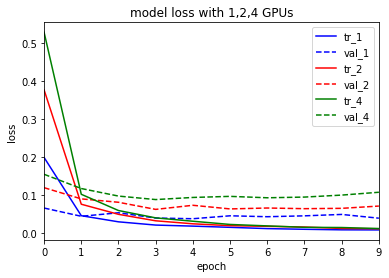

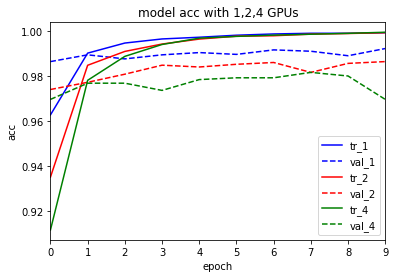

In [22]:
df_loss.plot(style=styles)
plt.title(f'model loss with 1,2,4 GPUs')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.savefig(f'ex4_loss.png')

df_acc.plot(style=styles)
plt.title(f'model acc with 1,2,4 GPUs')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.savefig(f'ex4_acc.png')